In [2]:
import numpy as np
from PIL import Image, ImageOps
from matplotlib import pyplot as plt
from matplotlib import mlab 
import cv2 as cv

Main Census Transform Function:
 *   Takes an image as input parameter
 *   Returns combined image of Input image, Grayscaled Input Image and    Census transform histogram and also saves a copy of the same.




In [6]:
def CensusTransform(img):
 
    #GrayScaling the image
    gry_img = ImageOps.grayscale(img)

    #storing image size in w and h
    w, h = gry_img.size
    print('original image size: %d x %d = %d' % (w, h, w * h))
    print('image mode:', img.mode)

    #Convert image to Numpy array
    src_bytes = np.asarray(gry_img)

    #Initialize output array
    census = np.zeros((h-2, w-2), dtype='uint8')

    #centre pixels, which are offset by (1, 1)
    cp = src_bytes[1:h-1, 1:w-1]

    #offsets of non-central pixels 
    offsets = [(u, v) for v in range(3) for u in range(3) if not u == 1 == v]

    #Do the pixel comparisons
    for u,v in offsets:
        census = (census << 1) | (src_bytes[v:v+h-2, u:u+w-2] >= cp)

    #Convert transformed data to image
    out_img = Image.fromarray(census)
    out_img.show()
    out_img.save('CensusTransformed.jpg')
    #plt.imshow(out_img, cmap = plt.cm.gray )

    if w <= h:
       comb_img = concat_v (img, gry_img, out_img)
    else:
       comb_img = concat_h (img, gry_img, out_img)

    return comb_img


Concat Functions: To return combined images based on width and height of original image

In [ ]:
def concat_h(im1, im2, im3):
    dst = Image.new('RGB', (im1.width * 3 , im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    dst.paste(im3, (im1.width * 2, 0))
    return dst

def concat_v(im1, im2, im3):
    dst = Image.new('RGB', (im1.width, im1.height * 3))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    dst.paste(im3, (0, im1.height * 2))
    return dst


Driver Code: Saves and displays the combined image


original image size: 1280 x 720 = 921600
image mode: RGB


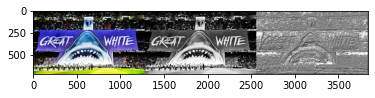

In [9]:
#driver code
#from PIL import Image
imgname = "greatwhite.jpg"
image = Image.open(img_name)
transform = CensusTransform (image)
transform.save(imgname.replace('.jpg','_CensusTransform.jpg'))
plt.imshow (transform, cmap = plt.cm.gray )